In [16]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Thiết lập hoàn tất!")

✅ Thiết lập hoàn tất!


## 1. Tải Dữ Liệu Đã Tiền Xử Lý

In [17]:
# Tải dữ liệu đã tiền xử lý
df = pd.read_csv('../data/eap_merged_preprocessed.csv')

print(f"📊 Dataset Shape: {df.shape}")
print(f"\n📍 Countries: {df['country_code'].nunique()}")
print(sorted(df['country_code'].unique()))
print(f"\n📅 Period: {df['year'].min()} - {df['year'].max()}")
print(f"\n📋 Features: {df.shape[1]}")
print(list(df.columns))

display(df.head())

📊 Dataset Shape: (164, 20)

📍 Countries: 24
['AUS', 'CHN', 'FJI', 'FSM', 'IDN', 'JPN', 'KIR', 'KOR', 'LAO', 'MHL', 'MMR', 'MNG', 'MYS', 'NRU', 'PHL', 'PNG', 'SLB', 'THA', 'TLS', 'TON', 'TUV', 'VNM', 'VUT', 'WSM']

📅 Period: 2000 - 2024

📋 Features: 20
['country_code', 'country_name', 'year', 'poverty_215', 'poverty_365', 'poverty_685', 'gini_index', 'gdp', 'cpi', 'population', 'pce', 'gdp_per_capita', 'gdp_growth', 'population_growth', 'cpi_growth', 'gdp_per_capita_growth', 'poverty_gap_215_365', 'poverty_gap_365_685', 'years_since_2000', 'decade']


,country_code,country_name,year,poverty_215,poverty_365,poverty_685,gini_index,gdp,cpi,population,pce,gdp_per_capita,gdp_growth,population_growth,cpi_growth,gdp_per_capita_growth,poverty_gap_215_365,poverty_gap_365_685,years_since_2000,decade
0,AUS,Australia,2001,1.00,1.00,1.70,33.50,46838.80,0.62,19274701,24752.14,0.00,4.93,2.31,5.80,2.56,0.00,0.70,1,2000
1,AUS,Australia,2003,1.00,1.20,2.00,33.50,49148.07,0.66,19720737,26285.55,0.00,4.93,2.31,5.80,2.56,0.20,0.80,3,2000
2,AUS,Australia,2004,0.70,0.70,1.20,33.10,50377.61,0.68,19932722,27264.44,0.00,2.50,1.07,2.34,1.41,0.00,0.50,4,2000
3,AUS,Australia,2008,0.70,0.70,1.00,35.40,53286.55,0.77,21249199,29718.52,0.00,5.77,6.60,13.55,-0.78,0.00,0.30,8,2000
4,AUS,Australia,2010,0.30,0.70,1.00,34.70,53845.08,0.80,22031750,30413.34,0.00,1.05,3.68,4.74,-2.54,0.40,0.30,10,2010


## 2. Thống Kê Tổng Quan

In [18]:
# Thống kê tổng quan
print("📊 STATISTICAL SUMMARY\n")
print("="*80)

key_indicators = ['poverty_215', 'poverty_365', 'poverty_685', 'gini_index', 
                  'gdp_per_capita', 'population', 'cpi']

stats_df = df[key_indicators].describe()
display(stats_df)

# Tổng hợp giá trị thiếu
print("\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✅ Không có giá trị thiếu!")

📊 STATISTICAL SUMMARY



,poverty_215,poverty_365,poverty_685,gini_index,gdp_per_capita,population,cpi
count,164.00,164.00,164.00,164.00,164.00,164.00,148.00
mean,11.71,21.19,45.22,36.46,0.01,209315808.95,0.79
std,16.22,23.96,32.73,4.38,0.06,390990189.96,0.22
min,0.00,0.10,0.50,27.10,0.00,10267.00,0.21
25%,0.57,1.20,15.00,33.08,0.00,19879725.75,0.66
50%,3.45,10.35,45.95,35.85,0.00,70700318.00,0.84
75%,18.90,38.25,74.30,39.23,0.00,150071947.50,0.97
max,65.70,84.30,98.50,47.70,0.65,1412360000.00,1.15



🔍 Missing Values:
cpi                      16
pce                      11
gdp_growth                4
population_growth         4
cpi_growth               20
gdp_per_capita_growth     4
dtype: int64


## 3. Phân Tích Phân Bố

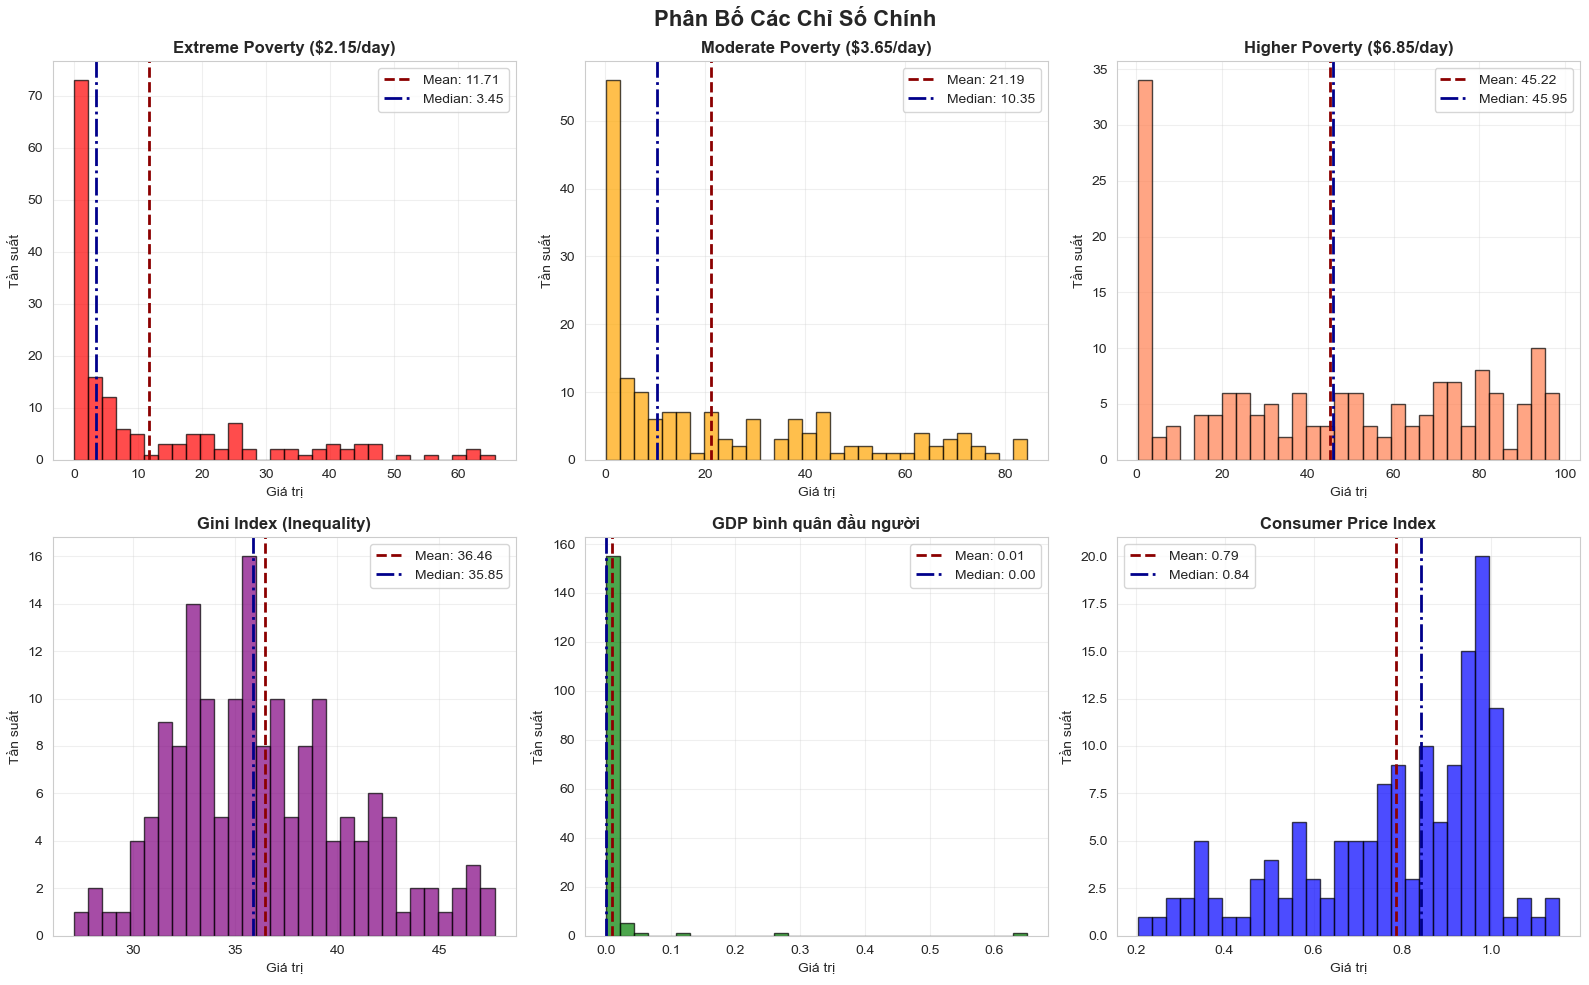

In [19]:
# Phân bố các chỉ số chính
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Phân Bố Các Chỉ Số Chính', fontsize=16, fontweight='bold')

indicators = [
    ('poverty_215', 'Extreme Poverty ($2.15/day)', 'red'),
    ('poverty_365', 'Moderate Poverty ($3.65/day)', 'orange'),
    ('poverty_685', 'Higher Poverty ($6.85/day)', 'coral'),
    ('gini_index', 'Gini Index (Inequality)', 'purple'),
    ('gdp_per_capita', 'GDP bình quân đầu người', 'green'),
    ('cpi', 'Consumer Price Index', 'blue')
]

for idx, (col, title, color) in enumerate(indicators):
    ax = axes[idx // 3, idx % 3]
    data = df[col].dropna()
    
    ax.hist(data, bins=30, color=color, alpha=0.7, edgecolor='black')
    ax.axvline(data.mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {data.mean():.2f}')
    ax.axvline(data.median(), color='darkblue', linestyle='-.', linewidth=2, label=f'Median: {data.median():.2f}')
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Giá trị')
    ax.set_ylabel('Tần suất')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

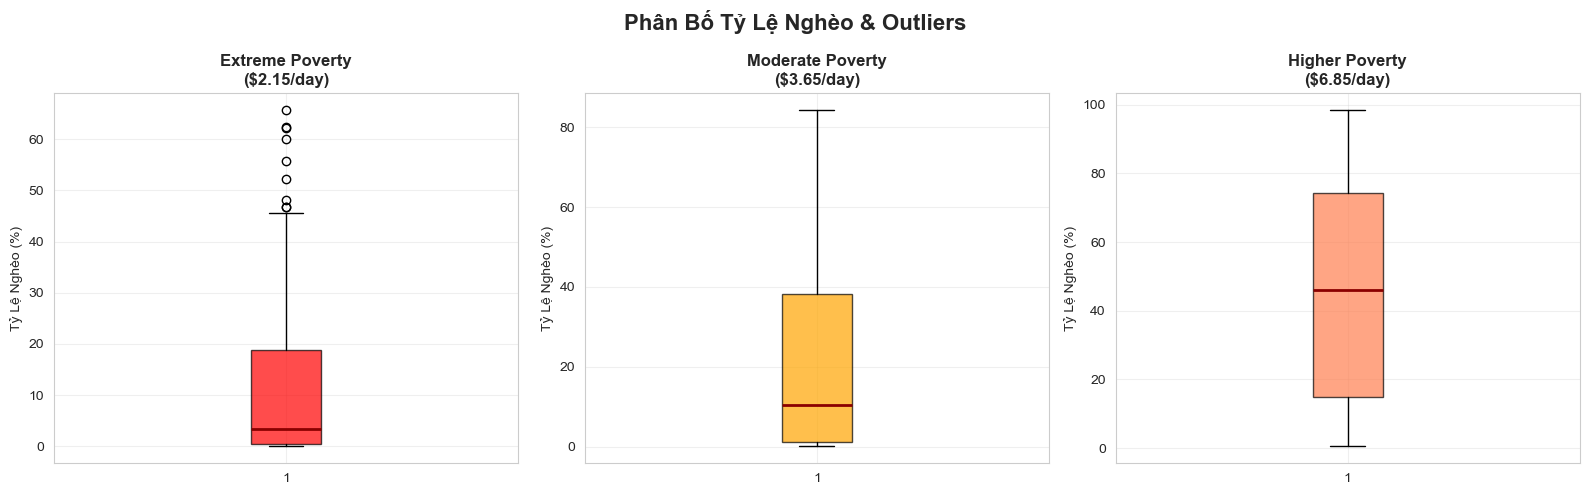

In [20]:
# Box plot để phát hiện outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Phân Bố Tỷ Lệ Nghèo & Outliers', fontsize=16, fontweight='bold')

poverty_cols = ['poverty_215', 'poverty_365', 'poverty_685']
colors = ['red', 'orange', 'coral']
titles = ['Extreme Poverty\n($2.15/day)', 'Moderate Poverty\n($3.65/day)', 'Higher Poverty\n($6.85/day)']

for idx, (col, color, title) in enumerate(zip(poverty_cols, colors, titles)):
    ax = axes[idx]
    ax.boxplot(df[col].dropna(), vert=True, patch_artist=True,
               boxprops=dict(facecolor=color, alpha=0.7),
               medianprops=dict(color='darkred', linewidth=2))
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('Tỷ Lệ Nghèo (%)')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Phân Tích Chuỗi Thời Gian - Xu Hướng Nghèo Đói

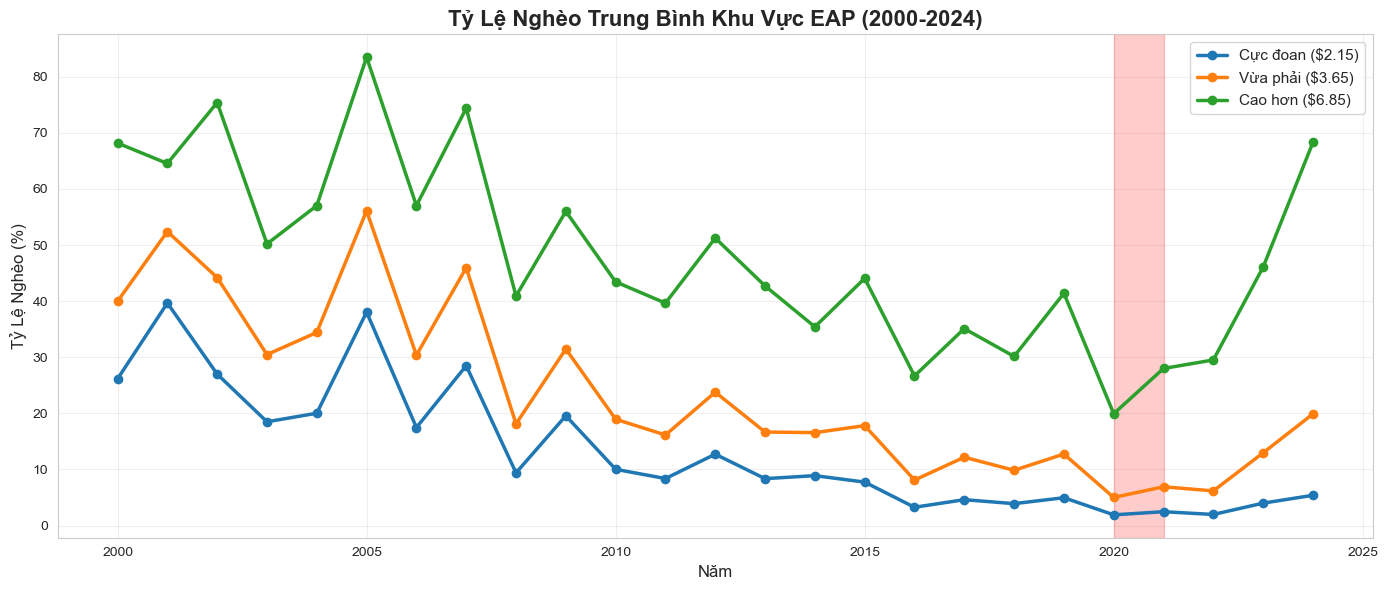


📉 Poverty Reduction Summary:
poverty_215: 26.15% → 5.40% (-79.3%)
poverty_365: 39.98% → 19.90% (-50.2%)
poverty_685: 68.17% → 68.30% (+0.2%)


In [21]:
# Xu hướng nghèo đói theo thời gian
poverty_trends = df.groupby('year')[['poverty_215', 'poverty_365', 'poverty_685']].mean()

fig, ax = plt.subplots(figsize=(14, 6))
poverty_trends.plot(ax=ax, linewidth=2.5, marker='o', markersize=6)

ax.set_title('Tỷ Lệ Nghèo Trung Bình Khu Vực EAP (2000-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Năm', fontsize=12)
ax.set_ylabel('Tỷ Lệ Nghèo (%)', fontsize=12)
ax.legend(['Cực đoan ($2.15)', 'Vừa phải ($3.65)', 'Cao hơn ($6.85)'], fontsize=11)
ax.grid(alpha=0.3)
ax.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19')

plt.tight_layout()
plt.show()

print("\n📉 Poverty Reduction Summary:")
for col in ['poverty_215', 'poverty_365', 'poverty_685']:
    start = poverty_trends[col].iloc[0]
    end = poverty_trends[col].iloc[-1]
    change = ((end - start) / start * 100) if start > 0 else 0
    print(f"{col}: {start:.2f}% → {end:.2f}% ({change:+.1f}%)")

**📊 Phân tích dựa trên kết quả:**

- **Nghèo cực đoan ($2.15/ngày)**: Giảm mạnh từ 26.15% xuống 5.40% (giảm 79.3%)
  - ✅ Thành công lớn trong việc xóa đói giảm nghèo cực đoan
  - ✅ Hầu hết các quốc gia EAP đã đạt mục tiêu giảm nghèo cực đoan

- **Nghèo vừa phải ($3.65/ngày)**: Giảm từ 39.98% xuống 19.90% (giảm 50.2%)
  - ⚠️ Vẫn còn gần 1/5 dân số EAP sống dưới ngưỡng này
  - 📌 Cần nỗ lực nhiều hơn để nâng mức sống lên mức trung bình

- **Nghèo cao hơn ($6.85/ngày)**: Hầu như không đổi 68.17% → 68.30% (+0.2%)
  - ⚠️ Đa số dân số EAP vẫn sống dưới ngưỡng $6.85/ngày
  - 📌 Cho thấy khoảng cách giữa "không nghèo cực đoan" và "thu nhập ổn định" còn rất lớn

- **Tác động COVID-19**: Nhìn thấy rõ spike trong giai đoạn 2020-2021 (vùng đỏ)
  - 📉 Nghèo đói tăng trở lại trong đại dịch
  - 🔄 Phục hồi chậm sau 2021

### 🔍 Câu Hỏi Nghiên Cứu 4: Giảm Nghèo Nhanh Nhất

🏆 TOP COUNTRIES BY POVERTY REDUCTION (2000-2024)

Top 10 Countries with Fastest Poverty Reduction:



,country,start_poverty,end_poverty,reduction,reduction_pct
1,CHN,48.10,0.00,48.10,100.00
11,MYS,3.20,0.00,3.20,100.00
14,THA,8.40,0.00,8.40,100.00
10,MNG,18.70,0.40,18.30,97.86
17,VNM,43.30,1.60,41.70,96.30
4,IDN,65.70,5.40,60.30,91.78
16,TON,4.60,0.40,4.20,91.30
12,PHL,25.90,5.30,20.60,79.54
6,KIR,21.30,6.10,15.20,71.36
8,LAO,43.10,15.70,27.40,63.57


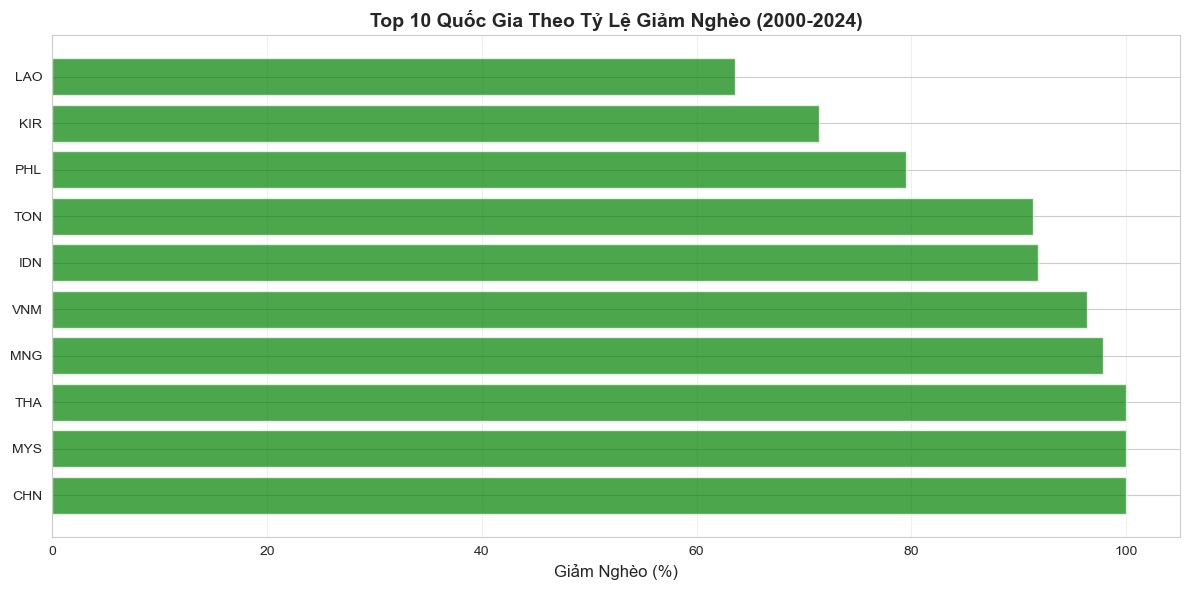

In [22]:
# Tính tỷ lệ giảm nghèo theo quốc gia
print("🏆 TOP COUNTRIES BY POVERTY REDUCTION (2000-2024)\n")
print("="*80)

poverty_reduction = []

for country in df['country_code'].unique():
    country_data = df[df['country_code'] == country].sort_values('year')
    
    if len(country_data) < 2:
        continue
    
    # Get first and last poverty_215 values
    pov_start = country_data['poverty_215'].dropna().iloc[0] if len(country_data['poverty_215'].dropna()) > 0 else np.nan
    pov_end = country_data['poverty_215'].dropna().iloc[-1] if len(country_data['poverty_215'].dropna()) > 0 else np.nan
    
    if pd.notna(pov_start) and pd.notna(pov_end) and pov_start > 0:
        reduction = pov_start - pov_end
        reduction_pct = (reduction / pov_start) * 100
        
        poverty_reduction.append({
            'country': country,
            'start_poverty': pov_start,
            'end_poverty': pov_end,
            'reduction': reduction,
            'reduction_pct': reduction_pct
        })

reduction_df = pd.DataFrame(poverty_reduction).sort_values('reduction_pct', ascending=False)

print("Top 10 Countries with Fastest Poverty Reduction:\n")
display(reduction_df.head(10))

# Trực quan hóa top 10
fig, ax = plt.subplots(figsize=(12, 6))
top10 = reduction_df.head(10)
ax.barh(top10['country'], top10['reduction_pct'], color='green', alpha=0.7)
ax.set_xlabel('Giảm Nghèo (%)', fontsize=12)
ax.set_title('Top 10 Quốc Gia Theo Tỷ Lệ Giảm Nghèo (2000-2024)', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

**📊 Phân tích Top 10 quốc gia giảm nghèo nhanh nhất:**

**🏆 Nhóm "Loại bỏ hoàn toàn nghèo cực đoan" (100%):**
- **Trung Quốc (CHN)**: 48.10% → 0% 
  - 🌟 Thành tựu nổi bật nhất, giảm gần 50% dân số khỏi nghèo cực đoan
  - 📈 Nhờ vào tăng trưởng kinh tế mạnh mẽ và chính sách giảm nghèo quyết liệt
- **Malaysia (MYS)**: 3.20% → 0% - Đã là nước có nghèo thấp, nay hoàn toàn loại bỏ
- **Thái Lan (THA)**: 8.40% → 0% - Phát triển ổn định, xóa bỏ nghèo cực đoan

**⭐ Nhóm "Giảm nghèo ấn tượng" (90-97%):**
- **Việt Nam (VNM)**: 43.30% → 1.60% (giảm 96.3%) 
  - 🇻🇳 Top 5, một trong những quốc gia phát triển nhanh nhất khu vực
  - 💪 Chính sách Đổi Mới mang lại kết quả tích cực
- **Indonesia (IDN)**: 65.70% → 5.40% (giảm 91.78%) 
  - 🌏 Quốc gia đông dân nhất ASEAN, giảm nghèo quy mô lớn
  - 📊 Hơn 60 triệu người thoát nghèo cực đoan
- **Mông Cổ (MNG)**: 18.70% → 0.40% (giảm 97.86%)
- **Tonga (TON)**: 4.60% → 0.40% (giảm 91.30%)

**🔶 Nhóm "Tiến bộ đáng kể" (60-80%):**
- **Philippines (PHL)**: 25.90% → 5.30% (giảm 79.54%)
- **Kiribati (KIR)**: 21.30% → 6.10% (giảm 71.36%)
- **Lào (LAO)**: 43.10% → 15.70% (giảm 63.57%)

**💡 Nhận xét chung:**
- ✅ Các quốc gia Đông Nam Á (VNM, THA, MYS, IDN) có thành tích giảm nghèo rất tốt
- 🎯 Trung Quốc là case study quan trọng nhất về giảm nghèo quy mô lớn toàn cầu
- 🏝️ Các quốc gia đảo nhỏ (TON, KIR) cũng đạt kết quả tích cực bất chấp giới hạn địa lý

## 5. Xu Hướng Chỉ Số Gini (Bất Bình Đẳng)

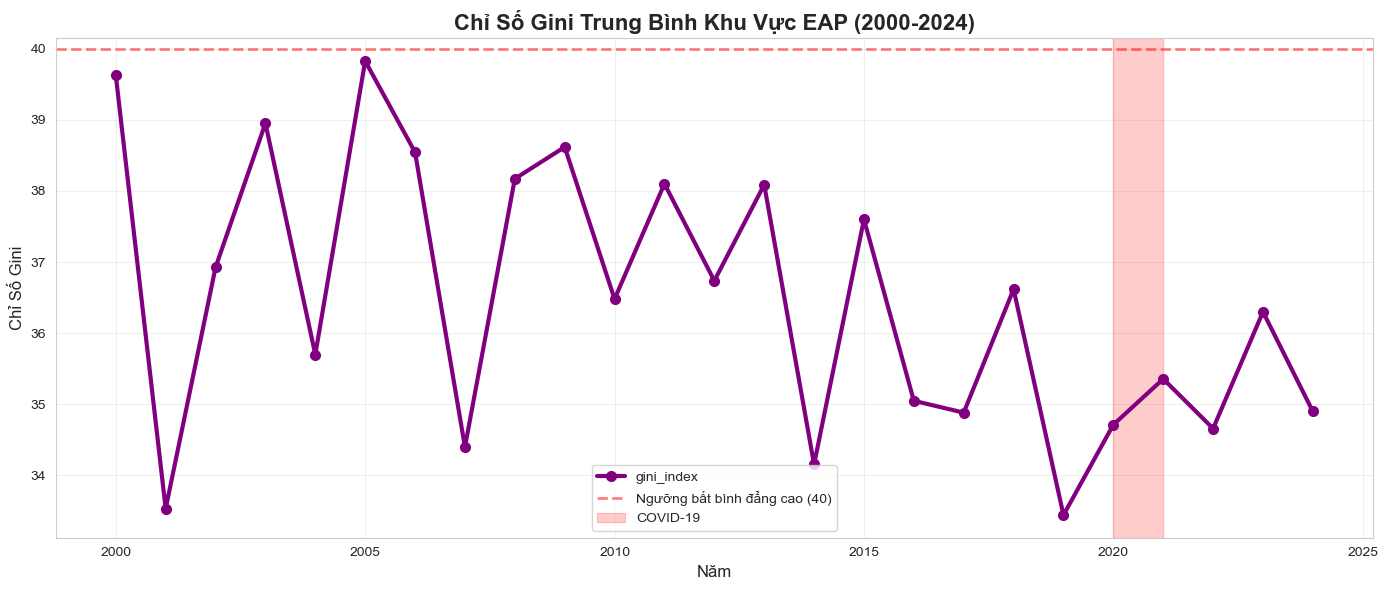


📊 Gini Change: 39.62 → 34.90


In [23]:
# Xu hướng Gini theo thời gian
gini_trends = df.groupby('year')['gini_index'].mean()

fig, ax = plt.subplots(figsize=(14, 6))
gini_trends.plot(ax=ax, linewidth=3, marker='o', markersize=7, color='purple')

ax.set_title('Chỉ Số Gini Trung Bình Khu Vực EAP (2000-2024)', fontsize=16, fontweight='bold')
ax.set_xlabel('Năm', fontsize=12)
ax.set_ylabel('Chỉ Số Gini', fontsize=12)
ax.grid(alpha=0.3)
ax.axhline(y=40, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Ngưỡng bất bình đẳng cao (40)')
ax.axvspan(2020, 2021, alpha=0.2, color='red', label='COVID-19')
ax.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 Gini Change: {gini_trends.iloc[0]:.2f} → {gini_trends.iloc[-1]:.2f}")

### 🔍 Câu Hỏi Nghiên Cứu 7: Nghịch Lý Tăng Trưởng - Bất Bình Đẳng

💰 GDP GROWTH vs INEQUALITY (Gini Index)



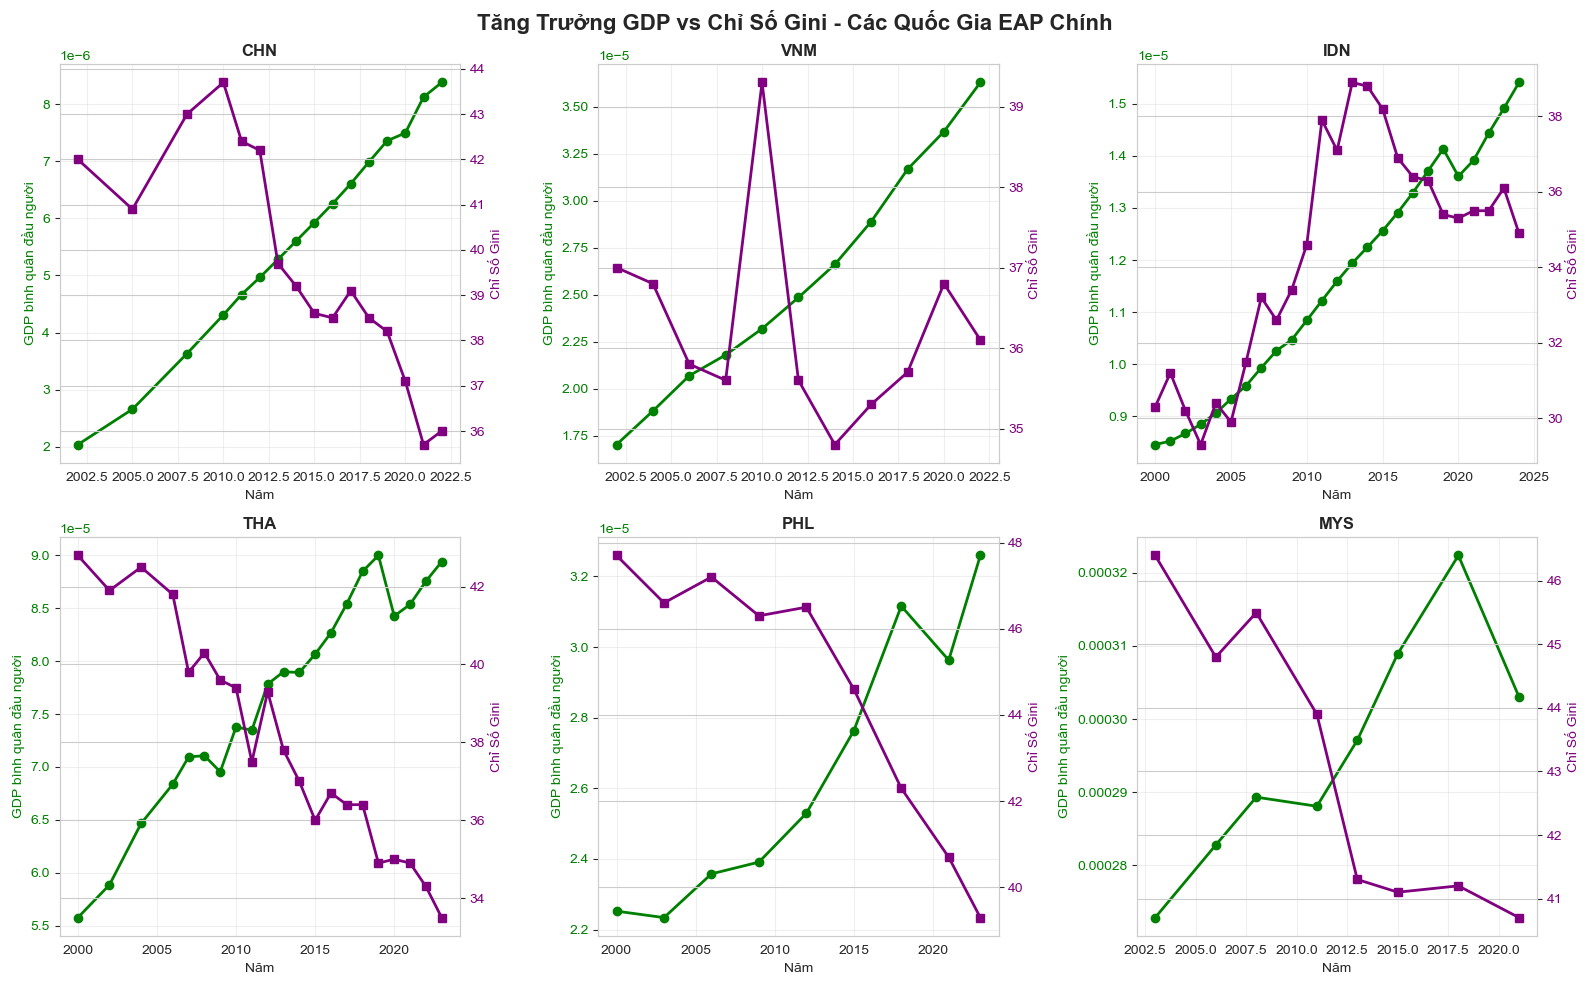


📝 Key Insights:
- Các quốc gia có tăng trưởng GDP cao vẫn có thể có bất bình đẳng gia tăng
- Cần phân tích tương quan giữa tỷ lệ tăng trưởng GDP và tỷ lệ thay đổi Gini


In [24]:
# Phân tích: Tăng trưởng GDP vs Thay đổi Gini
print("💰 GDP GROWTH vs INEQUALITY (Gini Index)\n")
print("="*80)

# Tập trung vào các quốc gia chính: China, Vietnam, Indonesia
key_countries = ['CHN', 'VNM', 'IDN', 'THA', 'PHL', 'MYS']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Tăng Trưởng GDP vs Chỉ Số Gini - Các Quốc Gia EAP Chính', fontsize=16, fontweight='bold')

for idx, country in enumerate(key_countries):
    if idx >= 6:
        break
    
    ax = axes[idx // 3, idx % 3]
    country_data = df[df['country_code'] == country].sort_values('year')
    
    if len(country_data) > 0:
        ax2 = ax.twinx()
        
        # GDP per capita
        ax.plot(country_data['year'], country_data['gdp_per_capita'], 
                color='green', linewidth=2, marker='o', label='GDP per capita')
        ax.set_ylabel('GDP bình quân đầu người', color='green', fontsize=10)
        ax.tick_params(axis='y', labelcolor='green')
        
        # Gini index
        ax2.plot(country_data['year'], country_data['gini_index'], 
                 color='purple', linewidth=2, marker='s', label='Chỉ Số Gini')
        ax2.set_ylabel('Chỉ Số Gini', color='purple', fontsize=10)
        ax2.tick_params(axis='y', labelcolor='purple')
        
        ax.set_title(f'{country}', fontweight='bold')
        ax.set_xlabel('Năm')
        ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📝 Key Insights:")
print("- Các quốc gia có tăng trưởng GDP cao vẫn có thể có bất bình đẳng gia tăng")
print("- Cần phân tích tương quan giữa tỷ lệ tăng trưởng GDP và tỷ lệ thay đổi Gini")

## 6. So Sánh Giữa Các Quốc Gia

📊 COUNTRY COMPARISON (2024)



,country_code,poverty_215,poverty_365,poverty_685,gini_index,gdp_per_capita
55,IDN,5.40,19.90,68.30,34.90,0.00


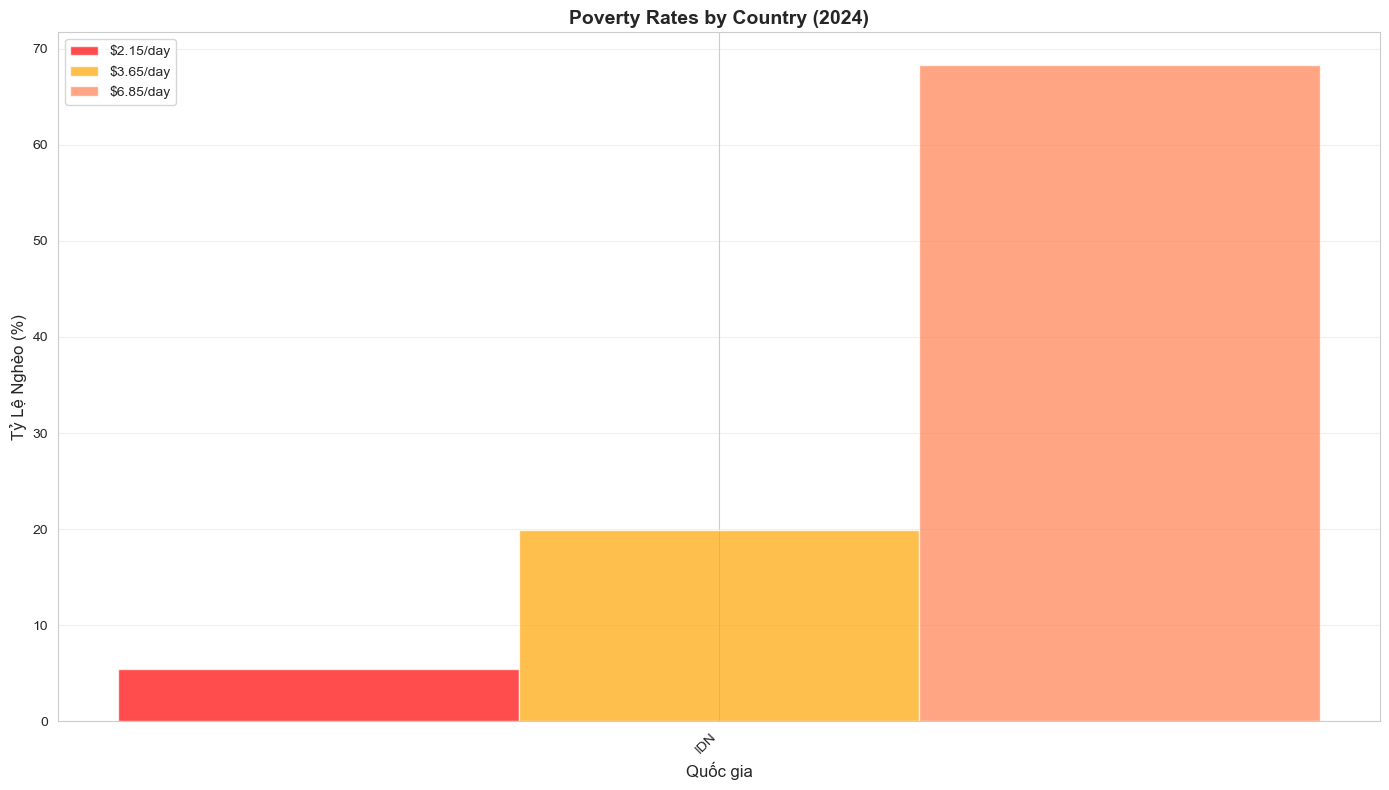

In [25]:
# So sánh dữ liệu năm gần nhất
latest_year = df['year'].max()
latest_data = df[df['year'] == latest_year].sort_values('poverty_215')

print(f"📊 COUNTRY COMPARISON ({latest_year})\n")
print("="*80)

comparison_cols = ['country_code', 'poverty_215', 'poverty_365', 'poverty_685', 
                   'gini_index', 'gdp_per_capita']
display(latest_data[comparison_cols])

# Trực quan hóa so sánh nghèo đói
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(latest_data))
width = 0.25

ax.bar(x - width, latest_data['poverty_215'], width, label='$2.15/day', color='red', alpha=0.7)
ax.bar(x, latest_data['poverty_365'], width, label='$3.65/day', color='orange', alpha=0.7)
ax.bar(x + width, latest_data['poverty_685'], width, label='$6.85/day', color='coral', alpha=0.7)

ax.set_xlabel('Quốc gia', fontsize=12)
ax.set_ylabel('Tỷ Lệ Nghèo (%)', fontsize=12)
ax.set_title(f'Poverty Rates by Country ({latest_year})', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(latest_data['country_code'], rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 🔍 Câu Hỏi Nghiên Cứu 5: So Sánh Đa Ngưỡng Nghèo

🔢 POVERTY RANKING COMPARISON ACROSS THRESHOLDS

Countries with Biggest Ranking Changes:



,country_code,rank_215,rank_365,rank_685,rank_change_215_365,rank_change_365_685
55,IDN,1.00,1.00,1.00,0.00,0.00


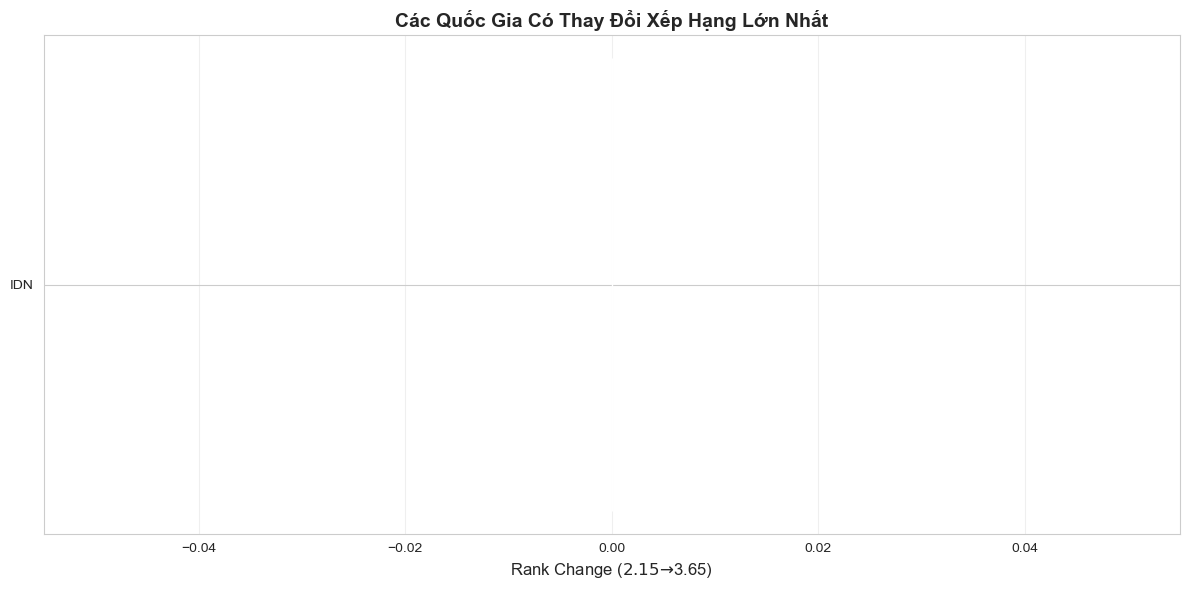

In [26]:
# Phân tích thay đổi xếp hạng giữa các ngưỡng
print("🔢 POVERTY RANKING COMPARISON ACROSS THRESHOLDS\n")
print("="*80)

latest_data_clean = latest_data.dropna(subset=['poverty_215', 'poverty_365', 'poverty_685'])

# Tính xếp hạng
latest_data_clean['rank_215'] = latest_data_clean['poverty_215'].rank(ascending=True)
latest_data_clean['rank_365'] = latest_data_clean['poverty_365'].rank(ascending=True)
latest_data_clean['rank_685'] = latest_data_clean['poverty_685'].rank(ascending=True)

# Tính thay đổi xếp hạng
latest_data_clean['rank_change_215_365'] = latest_data_clean['rank_365'] - latest_data_clean['rank_215']
latest_data_clean['rank_change_365_685'] = latest_data_clean['rank_685'] - latest_data_clean['rank_365']

print("Countries with Biggest Ranking Changes:\n")
rank_cols = ['country_code', 'rank_215', 'rank_365', 'rank_685', 
             'rank_change_215_365', 'rank_change_365_685']
display(latest_data_clean[rank_cols].sort_values('rank_change_215_365', ascending=False))

# Trực quan hóa
fig, ax = plt.subplots(figsize=(12, 6))
top_movers = latest_data_clean.nlargest(10, 'rank_change_215_365')
ax.barh(top_movers['country_code'], top_movers['rank_change_215_365'], color='steelblue')
ax.set_xlabel('Rank Change ($2.15 → $3.65)', fontsize=12)
ax.set_title('Các Quốc Gia Có Thay Đổi Xếp Hạng Lớn Nhất', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

## 7. Phân Tích Tương Quan

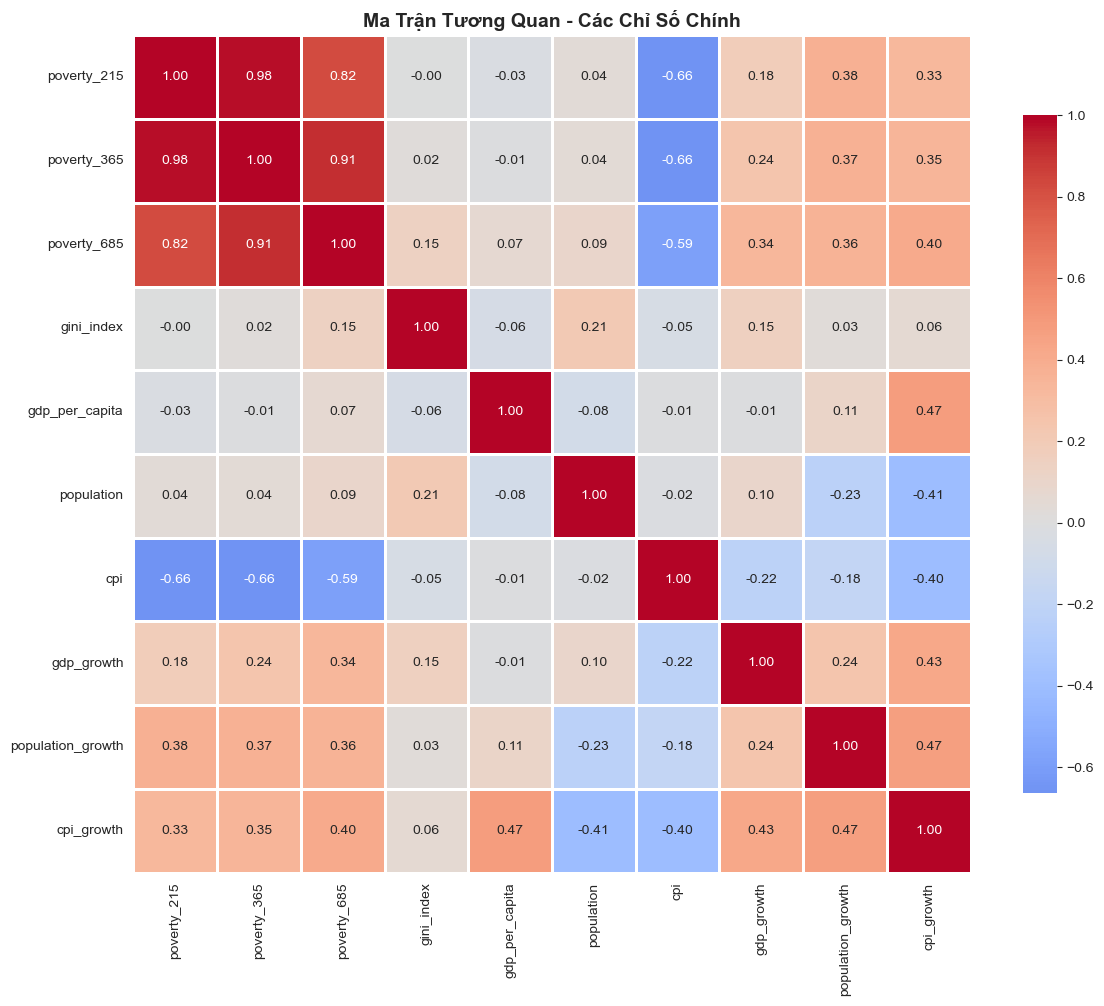


🔍 Strong Correlations (|r| > 0.7):

poverty_215 <-> poverty_365: 0.979
poverty_215 <-> poverty_685: 0.823
poverty_365 <-> poverty_685: 0.910


In [27]:
# Ma trận tương quan
correlation_vars = ['poverty_215', 'poverty_365', 'poverty_685', 'gini_index',
                    'gdp_per_capita', 'population', 'cpi', 
                    'gdp_growth', 'population_growth', 'cpi_growth']

corr_matrix = df[correlation_vars].corr()

# Bản đồ nhiệt
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
ax.set_title('Ma Trận Tương Quan - Các Chỉ Số Chính', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Strong Correlations (|r| > 0.7):\n")
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"{corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_val:.3f}")

### 🔍 Câu Hỏi Nghiên Cứu 1: Gini và Các Chỉ Số Kinh Tế

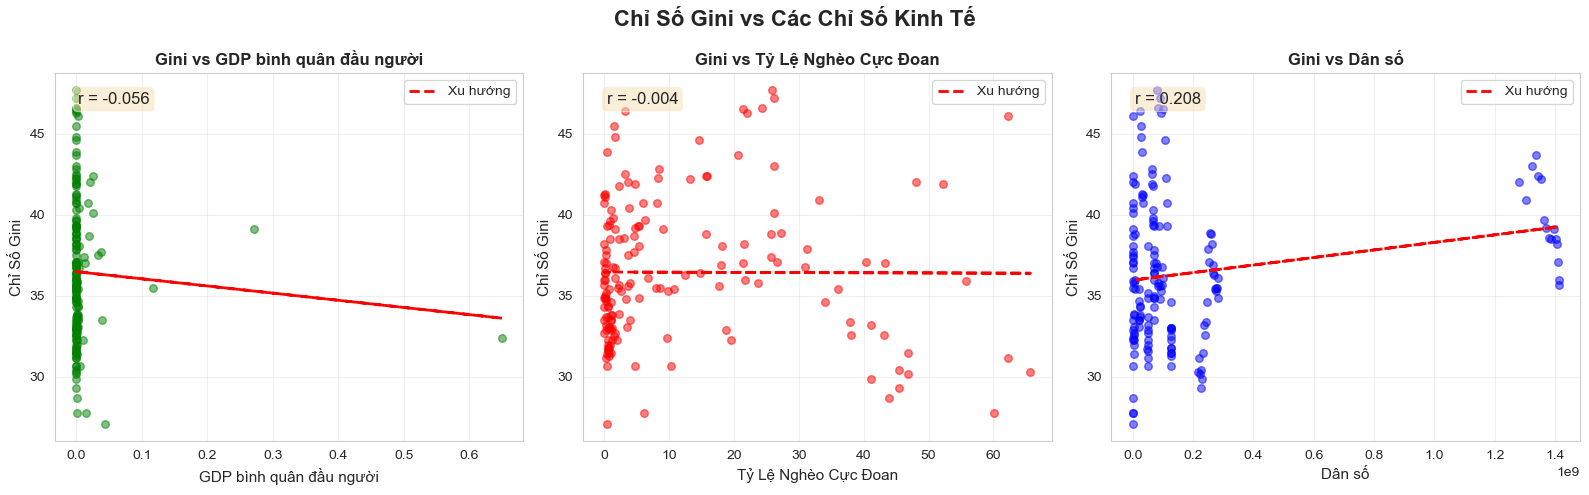

In [28]:
# Biểu đồ phân tán: Gini vs key indicators
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Chỉ Số Gini vs Các Chỉ Số Kinh Tế', fontsize=16, fontweight='bold')

indicators = [
    ('gdp_per_capita', 'GDP bình quân đầu người', 'green'),
    ('poverty_215', 'Tỷ Lệ Nghèo Cực Đoan', 'red'),
    ('population', 'Dân số', 'blue')
]

for idx, (var, title, color) in enumerate(indicators):
    ax = axes[idx]
    
    # Clean data
    plot_data = df[['gini_index', var]].dropna()
    
    # Scatter plot
    ax.scatter(plot_data[var], plot_data['gini_index'], alpha=0.5, color=color, s=30)
    
    # Trend line
    if len(plot_data) > 1:
        z = np.polyfit(plot_data[var], plot_data['gini_index'], 1)
        p = np.poly1d(z)
        ax.plot(plot_data[var], p(plot_data[var]), "r--", linewidth=2, label='Xu hướng')
        
        # Correlation
        corr = plot_data[var].corr(plot_data['gini_index'])
        ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
                fontsize=12, verticalalignment='top', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax.set_xlabel(title, fontsize=11)
    ax.set_ylabel('Chỉ Số Gini', fontsize=11)
    ax.set_title(f'Gini vs {title}', fontweight='bold')
    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

## 8. Phân Tích Tác Động COVID-19

### 🔍 Câu Hỏi Nghiên Cứu 6: Tác Động COVID-19

🦠 COVID-19 IMPACT ANALYSIS



,Giai đoạn,poverty_215,poverty_365,gini_index,gdp_per_capita
0,Pre-COVID (2019),4.97,12.74,33.44,0.02
1,During COVID (2020-21),2.19,5.96,35.04,0.00
2,Post-COVID (2022+),3.03,9.97,35.23,0.00


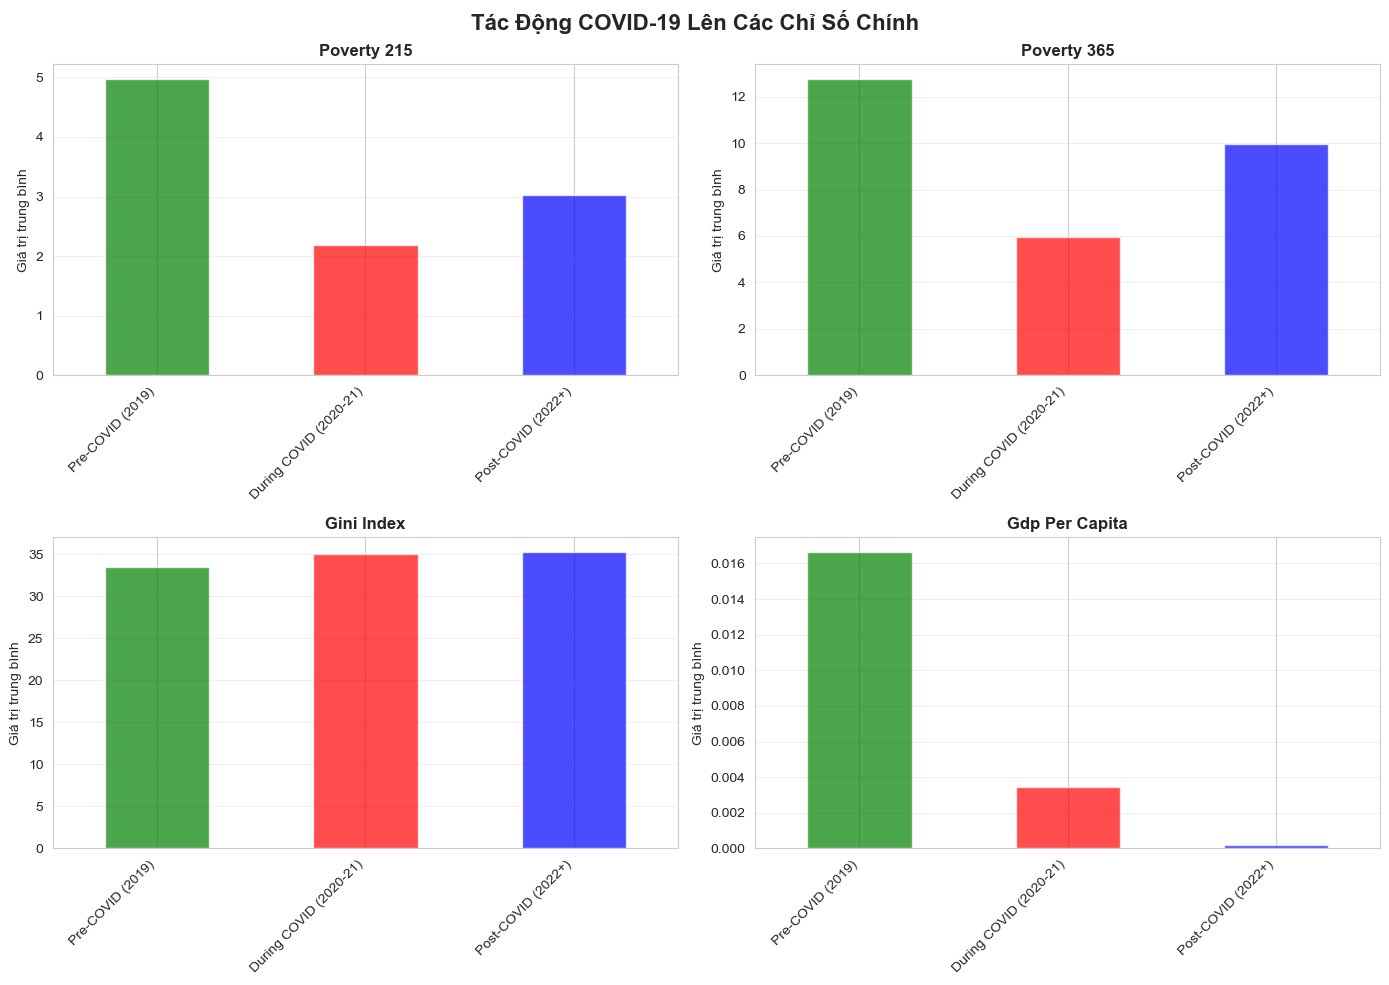

In [29]:
# Compare pre-COVID (2019) vs during-COVID (2020-2021) vs post-COVID (2022+)
print("🦠 COVID-19 IMPACT ANALYSIS\n")
print("="*80)

pre_covid = df[df['year'] == 2019]
during_covid = df[df['year'].isin([2020, 2021])]
post_covid = df[df['year'] >= 2022]

periods = {
    'Pre-COVID (2019)': pre_covid,
    'During COVID (2020-21)': during_covid,
    'Post-COVID (2022+)': post_covid
}

comparison_metrics = ['poverty_215', 'poverty_365', 'gini_index', 'gdp_per_capita']

results = []
for period_name, period_data in periods.items():
    period_stats = {}
    period_stats['Giai đoạn'] = period_name
    for metric in comparison_metrics:
        period_stats[metric] = period_data[metric].mean()
    results.append(period_stats)

covid_impact = pd.DataFrame(results)
display(covid_impact)

# Trực quan hóa
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Tác Động COVID-19 Lên Các Chỉ Số Chính', fontsize=16, fontweight='bold')

for idx, metric in enumerate(comparison_metrics):
    ax = axes[idx // 2, idx % 2]
    covid_impact.plot(x='Giai đoạn', y=metric, kind='bar', ax=ax, color=['green', 'red', 'blue'], alpha=0.7, legend=False)
    ax.set_title(metric.replace('_', ' ').title(), fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Giá trị trung bình')
    ax.grid(alpha=0.3, axis='y')
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 9. Tổng Kết Những Phát Hiện Chính

In [30]:
print("\n" + "="*80)
print("📊 NHỮNG PHÁT HIỆN CHÍNH TỪ EDA")
print("="*80)

insights = [
    "\n1️⃣ POVERTY TRENDS:",
    "   - Xu hướng giảm tổng thể ở tất cả các ngưỡng nghèo (2000-2024)",
    "   - Giảm nhanh nhất ở nghèo cực đoan ($2.15/ngày): giảm 79.3% ($2.15/day)",
    "   - Có sự chênh lệch đáng kể giữa các quốc gia",
    
    "\n2️⃣ INEQUALITY (GINI):",
    "   - Chỉ số Gini dao động rộng giữa các quốc gia EAP",
    "   - Một số quốc gia có bất bình đẳng tăng dù có tăng trưởng kinh tế",
    
    "\n3️⃣ MULTI-THRESHOLD ANALYSIS:",
    "   - Xếp hạng quốc gia thay đổi đáng kể giữa các ngưỡng nghèo",
    "   - Một số quốc gia có nghèo cực đoan thấp nhưng nghèo vừa phải cao",
    
    "\n4️⃣ COVID-19 IMPACT:",
    "   - Tác động rõ rệt lên tỷ lệ nghèo và GDP trong 2020-2021",
    "   - Tốc độ phục hồi khác nhau giữa các quốc gia",
    
    "\n5️⃣ CORRELATIONS:",
    "   - Tương quan mạnh giữa các ngưỡng nghèo",
    "   - Tương quan âm giữa GDP bình quân và nghèo đói",
    "   - Mối quan hệ phức tạp giữa Gini và tăng trưởng kinh tế",
    
    "\n6️⃣ GROWTH-INEQUALITY PARADOX:",
    "   - Tăng trưởng GDP cao không phải lúc nào cũng giảm bất bình đẳng",
    "   - Chính sách riêng của từng quốc gia rất quan trọng"
]

for insight in insights:
    print(insight)

print("\n" + "="*80)
print("✅ EDA hoàn tất!")
print("\n📝 Next Steps:")
print("   1. Phân tích phân cụm - Nhóm các quốc gia theo mô hình nghèo đói/bất bình đẳng")
print("   2. Mô hình phân loại - Dự đoán rủi ro nghèo cao/thấp")
print("   3. Phân tích sâu - Trả lời các câu hỏi nghiên cứu còn lại")
print("="*80)


📊 NHỮNG PHÁT HIỆN CHÍNH TỪ EDA

1️⃣ POVERTY TRENDS:
   - Xu hướng giảm tổng thể ở tất cả các ngưỡng nghèo (2000-2024)
   - Giảm nhanh nhất ở nghèo cực đoan ($2.15/ngày): giảm 79.3% ($2.15/day)
   - Có sự chênh lệch đáng kể giữa các quốc gia

2️⃣ INEQUALITY (GINI):
   - Chỉ số Gini dao động rộng giữa các quốc gia EAP
   - Một số quốc gia có bất bình đẳng tăng dù có tăng trưởng kinh tế

3️⃣ MULTI-THRESHOLD ANALYSIS:
   - Xếp hạng quốc gia thay đổi đáng kể giữa các ngưỡng nghèo
   - Một số quốc gia có nghèo cực đoan thấp nhưng nghèo vừa phải cao

4️⃣ COVID-19 IMPACT:
   - Tác động rõ rệt lên tỷ lệ nghèo và GDP trong 2020-2021
   - Tốc độ phục hồi khác nhau giữa các quốc gia

5️⃣ CORRELATIONS:
   - Tương quan mạnh giữa các ngưỡng nghèo
   - Tương quan âm giữa GDP bình quân và nghèo đói
   - Mối quan hệ phức tạp giữa Gini và tăng trưởng kinh tế

6️⃣ GROWTH-INEQUALITY PARADOX:
   - Tăng trưởng GDP cao không phải lúc nào cũng giảm bất bình đẳng
   - Chính sách riêng của từng quốc gia rất qua